### Разностная схема (верхний уголок)

\begin{equation}
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = e^{u^2}
\end{equation}

#### Функции

In [1]:
function u_init(x, To)
    if (x >= 0) &&  (x <= 1)
        return To
    else
        return 0.0
    end
end

u_init (generic function with 1 method)

In [2]:
function u_right(t)
    return 0.0
end

u_right (generic function with 1 method)

In [3]:
function qei(Te, Ti)
    if Te == 0
        return 0.0
    else
        return (Te - Ti) / Te ^ 2
    end
end

qei (generic function with 1 method)

In [ ]:
function f_electron!(F, z, u1, u2, n, tau, h, kappa=0.2)
    N = size(u1[n, :]) - 1

    # Задаём уравнение с граничным условием для электронной температуры 
    k1 = 0.5 * (z[1] ^ (5 / 2) + z[2] ^ (5 / 2))
    F[1] = (z[1] - u1[n, 1]) / tau - kappa * (k1 * (z[2] - z[1])) / h ^ 2 + qei(u1[n, 1], u2[n, 1])
    # Задаём уравнения для электронной температуры
    for m in 2:(N - 1)
        k1 = 0.5 * (z[m] ^ (5 / 2) + z[m + 1] ^ (5 / 2))
        k2 = 0.5 * (z[m] ^ (5 / 2) + z[m - 1] ^ (5 / 2))
        F[m] = (z[m] - u1[n, m]) / tau - kappa * (k1 * (z[m + 1] - z[m]) / h -  k2 * (z[m] - z[m - 1]) / h) / h + qei(u1[n, m] - u2[n, m])
    end
    # Задаём уравнения на предпоследнем узле для электронной температуры
    k1 = 0.5 * z[N] ^ (5 / 2)
    k2 = 0.5 * (z[N] ^ (5 / 2) + z[N - 1] ^ (5 / 2))
    F[N] = (z[N] - u1[n, N]) / tau - kappa * (k1 * (0 - z[N]) / h -  k2 * (z[N] - z[N - 1]) / h) / h + qei(u1[n, N] - u2[n, N])
end

In [ ]:
function j_electron!(J, z, u1, u2, n, tau, h, kappa=0.2)
    N = size(u1[n, :]) - 1
    
    # Запишем частные производные для первого уравнения электронной температуры
    J[1, 1] = 1 / tau - kappa / (2 * h ^ 2) * (2.5 * z[1] ^ 1.5 * (z[2] - z[1]) - (z[1] ^ 2.5 + z[2] ^ 2.5))
    J[1, 2] = - kappa / (2 * h ^ 2) * (2.5 * z[2] ^ 1.5 * (z[2] - z[1]) + (z[1] ^ 2.5 + z[2] ^ 2.5))
    # Запишем частные производные для уравнений электронной температуры
    for i in 2:(N - 1)
        J[i, i - 1] = kappa / (2 * h ^ 2) * (2.5 * z[i - 1] ^ 1.5 * (z[i] - z[i - 1]) - (z[i - 1] ^ 2.5 + z[i] ^ 2.5))
        J[i, i] = 1 / tau - kappa / (2 * h ^ 2) * (2.5 * z[i] ^ 1.5 * (z[i + 1] - z[i]) - (z[i] ^ 2.5 + z[i + 1] ^ 2.5) -
            - 2.5 * z[i] ^ 1.5 * (z[i] - z[i - 1]) - (z[i - 1] ^ 2.5 + z[i] ^ 2.5))
        J[i, i + 1] = - kappa / (2 * h ^ 2) * (2.5 * z[i + 1] ^ 1.5 * (z[i + 1] - z[i]) + (z[i] ^ 2.5 + z[i + 1] ^ 2.5))
    end
    # Запишем частные производные для последнего уравнения электронной температуры
    J[N, N - 1] = kappa / (2 * h ^ 2) * (2.5 * z[N - 1] ^ 1.5 * (z[N] - z[N - 1]) - (z[N - 1] ^ 2.5 + z[N] ^ 2.5))
    J[N, N] = 1 / tau - kappa / (2 * h ^ 2) * (2.5 * z[N] ^ 1.5 * (0 - z[N]) - (z[N] ^ 2.5 + 0) -
            - 2.5 * z[N] ^ 1.5 * (z[N] - z[N - 1]) - (z[N - 1] ^ 2.5 + z[N] ^ 2.5))
end

In [ ]:
function f_ion!(F, z, u1, u2, n, tau, h, kappa=0.3)
    N = size(u2[n, :]) - 1
    # Задаём уравнение с граничным условием для ионной температуры 
    k1 = 0.5 * (z[1] ^ (3 / 2) + z[2] ^ (3 / 2))
    F[1] = (z[1] - u2[n, 1]) / tau - kappa * (k1 * (z[2] - z[1])) / h ^ 2 - qei(u1[n, 1] - u2[n, 1])
    # Задаём уравнения для ионной температуры
    for m in 2:(N - 1)
        k1 = 0.5 * (z[m] ^ (3 / 2) + z[m + 1] ^ (3 / 2))
        k2 = 0.5 * (z[m] ^ (3 / 2) + z[m - 1] ^ (3 / 2))
        F[m] = (z[m] - u2[n, m]) / tau - kappa * (k1 * (z[m + 1] - z[m]) / h -  k2 * (z[m] - z[m - 1]) / h) / h - qei(u1[n, m] - u2[n, m])
    end
    # Задаём уравнения на предпоследнем узле для электронной температуры
    k1 = 0.5 * z[N] ^ (3 / 2)
    k2 = 0.5 * (z[N] ^ (3 / 2) + z[N - 1] ^ (3 / 2))
    F[N] = (z[N] - u2[n, N]) / tau - kappa * (k1 * (0 - z[N]) / h -  k2 * (z[N] - z[N - 1]) / h) / h + qei(u1[n, N] - u2[n, N])
end

In [ ]:
function j!(J, z, u1, u2, n, tau, h)
    N = size(u2[n, :]) - 1
    
    # Запишем частные производные для первого уравнения электронной температуры
    J[1, 1] = 1 / tau - 0.2 / h * (0.5 / h * (2.5 * z[1] ^ 1.5 * (z[2] - z[1]) - (z[1] ^ 2.5 + z[2] ^ 2.5)))
    J[1, 2] = - 0.2 / h ^ 2 / 2 * (2.5 * z[2] ^ 1.5 * (z[2] - z[1]) + (z[1] ^ 2.5 + z[2] ^ 2.5))
    # Запишем частные производные для уравнений электронной температуры
    for i in 2:(N - 1)
        J[i, i] = 1 / tau - 0.2 / h * (0.5 / h * (2.5 * z[i] ^ 1.5 * (z[i + 1] - z[i]) - (z[i] ^ 2.5 + z[i + 1] ^ 2.5)) - 0.5 / h * (2.5 * z[i] ^ 2.5 * (z[i] - u[i - 1, n + 1]) + (u[i - 1, n + 1] ^ 2.5 + z[i] ^ 2.5)))
        J[i, i + 1] = - 0.2 / h ^ 2 / 2 * (2.5 * z[i + 1] ^ 1.5 * (z[i + 1] - z[i]) + (z[i] ^ 2.5 + z[i + 1] ^ 2.5))
    end
    # Запишем частные производные для последнего уравнения электронной температуры
    J[N, N] = 1 / tau - 0.2 / h * (0.5 / h * (2.5 * z[N] ^ 1.5 * (0 - z[N]) - (z[N] ^ 2.5 + 0)) - 0.5 / h * (2.5 * z[N] ^ 2.5 * (z[N] - u[N - 1, n + 1]) + (u[N - 1, n + 1] ^ 2.5 + z[N] ^ 2.5)))
    
    # Запишем частные производные для первого уравнения ионной температуры
    J[N + 1, N + 1] = 1 / tau - 0.3 / h * (0.5 / h * (1.5 * z[N + 1] ^ 0.5 * (z[N + 2] - z[N + 1]) - (z[N + 1] ^ 1.5 + z[N + 2] ^ 1.5)))
    J[N + 1, N + 2] = - 0.3 / h ^ 2 / 2 * (1.5 * z[N + 2] ^ 0.5 * (z[N + 2] - z[N + 1]) + (z[N + 1] ^ 1.5 + z[N + 2] ^ 1.5))
    # Запишем частные производные для уравнений электронной температуры
    for i in 2:(N - 1)
        J[N + i, N + i] = 1 / tau - 0.3 / h * (0.5 / h * (1.5 * z[N + i] ^ 0.5 * (z[N + i + 1] - z[N + i]) - (z[N + i] ^ 1.5 + z[N + i + 1] ^ 1.5)) - 0.5 / h * (1.5 * z[N + i] ^ 1.5 * (z[N + i] - u[i - 1, n + 1]) + (u[i - 1, n + 1] ^ 1.5 + z[N + i] ^ 1.5)))
        J[N + i, N + i + 1] = - 0.3 / h ^ 2 / 2 * (1.5 * z[N + i + 1] ^ 0.5 * (z[N + i + 1] - z[N + i]) + (z[N + i] ^ 1.5 + z[N + i + 1] ^ 1.5))
    end
    # Запишем частные производные для последнего уравнения электронной температуры
    J[2 * N, 2 * N] = 1 / tau - 0.3 / h * (0.5 / h * (1.5 * z[2 * N] ^ 0.5 * (0 - z[2 * N]) - (z[2 * N] ^ 1.5 + 0)) - 0.5 / h * (1.5 * z[2 * N] ^ 1.5 * (z[2 * N] - u[N - 1, n + 1]) + (u[N - 1, n + 1] ^ 1.5 + z[2 * N] ^ 1.5)))    
end

#### Задание переменных и начальных параметров

In [ ]:
# Начальные значения
a = 0
b = 10
t_0 = 0
T = 10
To = 2

In [ ]:
# Число узлов
M = 200
N = 6000

# Размер шага сетки
h = (b - a) / M
tau = (T - t_0) / N

tau / h ^ 2 * 0.5

In [ ]:
# Cетка
t = LinRange(t_0, T, N + 1)
x = LinRange(a, b, M + 1);

In [ ]:
x

In [ ]:
# Инициализация начальных значений
u1 = zeros(N + 1, M + 1)
u1[1, :] = u_init.(x, To);

u2 = zeros(N + 1, M + 1)
u2[1, :] = u_init.(x, To);

In [ ]:
using NLsolve

In [ ]:
using ProgressBars

In [ ]:
using NLsolve

function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18
    F[2] = sin(x[2]*exp(x[1])-1)
end

function j!(J, x)
    J[1, 1] = x[2]^3-7
    J[1, 2] = 3*x[2]^2*(x[1]+3)
    u = exp(x[1])*cos(x[2]*exp(x[1])-1)
    J[2, 1] = x[2]*u
    J[2, 2] = u
end

solution = nlsolve(f!, j!, [ 0.6; 2.0])

In [ ]:
for n in tqdm(1:N)
    # Electron func
    f_newton_electron!(F, z) =  f_electron!(F, z, u1, u2, n, tau, h)
    j_newton_electron!(J, z) = j_electron!(J, z, u1, u2, n, tau, h)
    solution_electron = nlsolve(f_newton_electron!, j_newton_electron!, u1[n, 1:M], iterations=2)
    u1[n + 1, 1:N] = solution_electron.zero
    # Ion func
    f_newton_ion!(F, z) =  f_ion!(F, z, u1, u2, n, tau, h)
    j_newton_ion!(J, z) = j_ion!(J, z, u1, u2, n, tau, h)
    solution_electron = nlsolve(f_newton_ion!, j_newton_ion!, u2[n, 1:M], iterations=2)
    u2[n + 1, 1:N] = solution_electron.zero
    break
end

In [ ]:
for n in tqdm(1:N)
    # Electron func
    f_newton_electron!(F, z) =  f_electron!(F, z, u1, u2, n, tau, h)
    j_newton_electron!(J, z) = j_electron!(J, z, u1, u2, n, tau, h)
    solution_electron = nlsolve(f_newton_electron!, j_newton_electron!, u1[1:N], iterations=2)
    u1[1:N, n + 1] = solution_electron.zero
    # Ion func
    f_newton_ion!(F, z) =  f_ion!(F, z, u1, u2, n, tau, h)
    j_newton_ion!(J, z) = j_ion!(J, z, u1, u2, n, tau, h)
    solution_electron = nlsolve(f_newton_ion!, j_newton_ion!, u2[1:N], iterations=2)
    u2[1:N, n + 1] = solution_electron.zero
    break
end

In [63]:
anim = @animate for i in 1:length(t):20
    plot(x, u1[:, i], legend=false, xlims=(0, 10), ylims=(0, 4))
    plot(x, u2[:, i], legend=false, xlims=(0, 10), ylims=(0, 4))
end

Animation("C:\\Users\\aleks\\AppData\\Local\\Temp\\jl_3v8H6p", ["000001.png"])

In [68]:
u1[:, 2]

201-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   0.0

┌ Info: Saved animation to 
│   fn = C:\Users\aleks\Documents\Projects\Comp math\donw_200_6000.gif
└ @ Plots C:\Users\aleks\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("C:\\Users\\aleks\\Documents\\Projects\\Comp math\\donw_200_6000.gif")
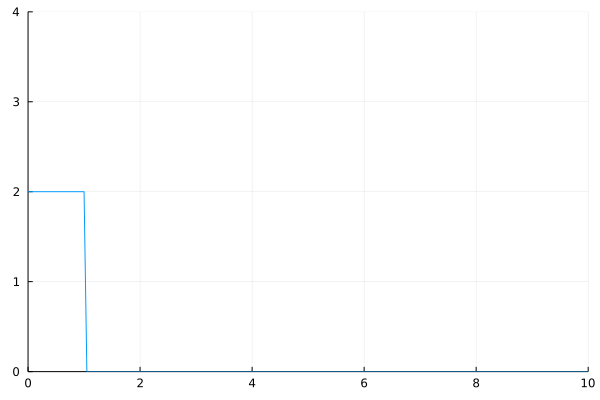

In [64]:
gif(anim, "donw_200_6000.gif", fps=30)

### Метод прямых

In [1]:
function u_init(x)
    return -x + 1
end

u_init (generic function with 1 method)

In [2]:
function u_left(t)
    return exp(-t)
end

u_left (generic function with 1 method)

In [110]:
function func(y, t, h, N)
    f = zeros(N)
    f[1] = -y[1] * (y[1] - u_left(t)) / h + exp(y[1] ^ 2)
    f[2:length(f)] = - y[2:length(f)] .* (y[2:length(f)] - y[1:length(f) - 1]) / h + exp.(y[2:length(f)] .^ 2)
    return f
end

func (generic function with 2 methods)

In [16]:
using LinearAlgebra

In [107]:
function func_y(y, t, h, N)
    f_y = zeros((N, N))
    f_y[1, 1] = (-2 * y[1] + u_left(t)) / h + 2 * y[1] * exp(y[1] ^ 2)
    f_y[diagind(f_y)[2:N]] = (-2 * y[2:N] + y[1:N-1]) / h + 2 * y[2:N] .* exp.(y[2:N] .^ 2)
    f_y[diagind(f_y, -1)] = y[2:N] / h
    return f_y
end

func_y (generic function with 1 method)

#### Задание переменных и начальных параметров

In [56]:
# Начальные значения
a = 0
b = 1
t_0 = 0
T = 0.3

0.3

In [58]:
# Коэффициент для одностадийного метода Розенброка
alpha = (1 + 1im) / 2
# Число узлов
N = 200
M = 300

300

In [59]:
# Cетка
t = LinRange(t_0, T, M + 1)
x = LinRange(a, b, N + 1);

In [60]:
# Размер шага сетки
h = (b - a) / N
tau = (T - t_0) / M

0.001

In [68]:
# Инициализация начальных значений
u = zeros(M + 1, N + 1)
y = zeros(M + 1, N)

u[1, :] = u_init.(x)
u[2:M + 1, 1] = u_left.(t[2:M + 1])
y[1, :] = u[1, 2:N+1];

#### Решение и визуализация

In [111]:
for m in tqdm(1:M)
    w_1 = (I - alpha * tau * func_y(y[m, :], t[m], h, N)) \ func(y[m, :], t[m] + tau / 2, h, N)
    y[m + 1, :] = y[m, :] + tau * real(w_1)
    u[m + 1, 2:N+1] = y[m + 1, :]
end

0.0%┣                                             ┫ 0/300 [00:00<00:-15, -0s/it]
0.3%┣▏                                         ┫ 1/300 [00:02<Inf:Inf, InfGs/it]
9.3%┣████▏                                        ┫ 28/300 [00:02<00:17, 16it/s]
22.3%┣█████████▉                                  ┫ 67/300 [00:02<00:06, 39it/s]
38.3%┣████████████████▌                          ┫ 115/300 [00:02<00:03, 65it/s]
53.0%┣██████████████████████▉                    ┫ 159/300 [00:02<00:02, 88it/s]
67.0%┣████████████████████████████▏             ┫ 201/300 [00:02<00:01, 108it/s]
81.0%┣██████████████████████████████████        ┫ 243/300 [00:02<00:00, 127it/s]
94.3%┣███████████████████████████████████████▋  ┫ 283/300 [00:02<00:00, 144it/s]
100.0%┣█████████████████████████████████████████┫ 300/300 [00:02<00:00, 151it/s]


In [114]:
anim = @animate for i in 1:length(t)
    plot(x, u[i, :], legend=false, xlims=(0, 1), ylims=(0, 3))
end

Animation("C:\\Users\\aleks\\AppData\\Local\\Temp\\jl_n8TfUk", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\aleks\Documents\Projects\Comp math\nonlin_lines_meth_200_300.gif
└ @ Plots C:\Users\aleks\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("C:\\Users\\aleks\\Documents\\Projects\\Comp math\\nonlin_lines_meth_200_300.gif")
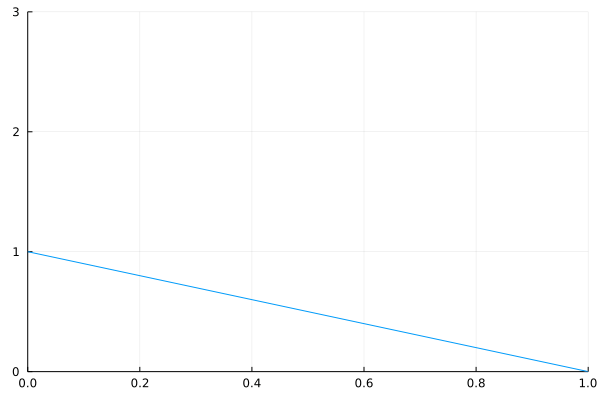

In [115]:
gif(anim, "nonlin_lines_meth_200_300.gif", fps=30)